In [234]:
import matplotlib.pyplot as plt
import brokenaxes
import pickle as pkl

from scipy.ndimage import interpolation
import ipdb
import glob
import numpy as np
from tqdm import tqdm

# Help: overall performance

In [25]:
def plot_bar_reward(results):
    # results: dict of Methods, for each method dict of tasks
    methods = list(results.keys())
    task_names = list(results[methods[0]].keys())
    fig = plt.figure(figsize=(13,5))
    ax = fig.subplots()

    w = 22
    x_pos = np.arange(len(task_names)) * len(methods) * w
    metric = 'SWS'
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    iter_col = 0
    for it, (method_name, result) in enumerate(results.items()):

        method = method_name
        offset = it + 0.5 - len(methods)/2
        wb = w * 12
        iter_col += 1
        if iter_col == len(colors):
            iter_col = 0
        curr_col = colors[iter_col]
        method = method.replace('randomgoal', 'randomgoal_corrected')

        x = [result[task]['Reward'][0] for task in task_names]
        xerr = [result[task]['Reward'][1] for task in task_names]
        ax.bar(x_pos*w+offset*wb,  x, width=wb*1.0,
               yerr=xerr, label=method,
               align='center', alpha=0.5, ecolor='black', capsize=3, edgecolor='white')
    ax.set_xticks(x_pos*w)
    ax.set_ylim([0., 1.1])

    labels = task_names
    ax.set_xticklabels(labels, fontsize=17, rotation=12)
    plt.ylabel(r'Reward', fontsize=20)


    plt.legend(loc='upper center', ncol=5, fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=15)
    # matplotlib.rc('xtick', labelsize=20
    plt.grid(axis='y')

    # plt.grid(True, linestyle='--', axis='y')
    plt.savefig('reward_plot_all.pdf')


In [26]:
def plot_scatter(results, task_name='all'):
    # res: dictionaru of metridc, for every metric dictionary of tasks
    fig = plt.figure(figsize=(10,7))

    alph = 0.8
    bax = brokenaxes.brokenaxes(ylims=((-0.24, 0.66), (1.0, 1.4)), hspace=.05)
    for method_name, result in results.items():
        res = result['all']

        bax.errorbar(res['SR'][0], res['SP'][0], xerr=res['SR'][1], 
                     yerr=res['SP'][1], label=method_name, alpha=alph, fmt='--o', capsize=3)
        bax.annotate(method_name, (res['SR'][0]+0.005, res['SP'][0]+0.04), fontsize=15)

        print(res['SR'], res['SP'])

    bax.set_xlabel('Success Rate', fontsize=20)
    bax.set_xlim(0.72, 1.03)

    bax.set_ylabel('Speed Up', fontsize=20)
    # bax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    # ax.set_xticklabels(labels, fontsize=17, rotation=12)
    # print(classes)


    # plt.legend(loc='upper center', ncol=5, fontsize=15)

    bax.tick_params(axis='both', which='major', labelsize=15)


    # bax.set_xticks(fontsize=12)
    # plt.yticks(fontsize=12)
    # bax.grid()
    bax.grid(axis='both', which='major', ls='-')
    bax.grid(axis='both', which='minor', ls='--', alpha=0.5)

    # plt.grid()
    # plt.tight_layout()
    plt.savefig('scatter_plot_filter_slides_2.eps')

    plt.legend()

In [27]:
with open('../../results_eval_helping.pik', 'rb') as f:
    results = pkl.load(f)
print(results.keys())

dict_keys(['Main', 'GT', 'Uniform', 'w/o InvPlanning', '1 Goal', 'Ours'])


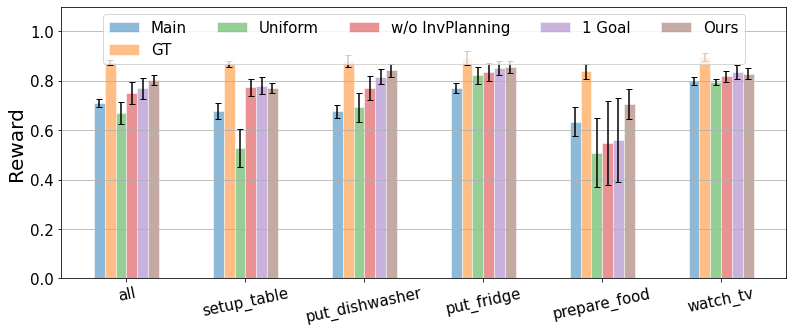

In [28]:
plot_bar_reward(results)

[0.99, 0.0099498743710662] [0.0, 0.0]
[1.0, 0.0] [1.1910045169270578, 0.12630560249489298]
[1.0, 0.0] [-0.05668537505351769, 0.06762079023390472]
[0.95, 0.048733971724044825] [0.29090579052530935, 0.09268304404001619]
[0.95, 0.048733971724044825] [0.42811987022234793, 0.09024596781415711]
[1.0, 0.0] [0.43982622371265295, 0.10289322471013539]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


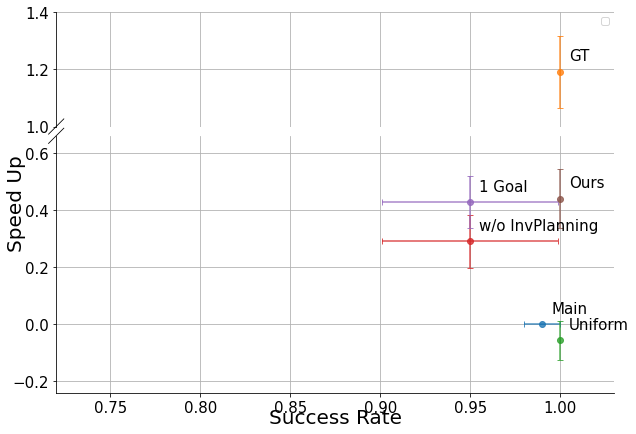

In [29]:
with open('../../results_eval_helping.pik', 'rb') as f:
    results = pkl.load(f)
plot_scatter(results)

# Goal Inference
How does goal inference change for different methods?

In [181]:
eps = 1e-9
def bin_data(res, length, nbins=20, debug=False):
    # put data in nbins according to episode length
    # res: #seeds x time_steps 
    length = int(length)
    try:
        nseeds = res.shape[0]
    except:
        idpb.set_trace()
    bin_data = np.zeros((nbins, nseeds))
    for seed in range(nseeds):
        zoom_val = nbins*1.0 / length
        val = interpolation.zoom(res[seed, :length], zoom_val)
        try:
            bin_data[:, seed] = val
        except:
            ipdb.set_trace()
    points_interp = np.linspace(0, length-1, nbins)

    bin_data_mean = bin_data.mean(1)
    return bin_data_mean


/tmp/ipykernel_28771/2148286212.py:13: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  val = interpolation.zoom(res[seed, :length], zoom_val)
/tmp/ipykernel_28771/2148286212.py:13: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  val = interpolation.zoom(res[seed, :length], zoom_val)


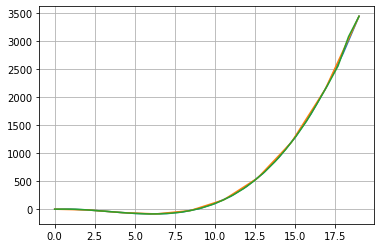

In [213]:

y = np.array([x**3-10*x**2+10*x for x in range(20)])

xx = np.array([x for x in range(20)])
# y = xx
plt.plot(xx, y)

nbin = 10
y2 = bin_data(y[None, :], len(y), nbin)
points_interp = np.linspace(0, len(xx)-1, nbin)
# print(y2.shape)
plt.plot(points_interp, y2)
# plt.grid()


nbin = 30
y2 = bin_data(y[None, :], len(y), nbin)
points_interp = np.linspace(0, len(xx)-1, nbin)
# print(y2.shape)
plt.plot(points_interp, y2)
plt.grid()

In [248]:



def get_files(file_path, use_posterior=False):
    if use_posterior:
        files = [file for file in glob.glob('{}/logs*.pkl'.format(file_path)) if 'posterior' in file]
        if len(files) == 0:
            files = [file for file in glob.glob('{}/logs*.pik?'.format(file_path)) if 'posterior' in file]
            print(file_path)
            
    else:
        files = [file for file in glob.glob('{}/logs*.pkl'.format(file_path)) if 'posterior' not in file]
        if len(files) == 0:
            files = [file for file in glob.glob('{}/logs*.pik?'.format(file_path)) if 'posterior' in file]
            print(file_path)
    return files


def compute_metrics_particles(pred_graphs, task_graph_gt):
    if len(pred_graphs) == 0:
        return {
            "recall": 0,
            "recallmax": 0,
            "accuracy": 0,
            "accuracymax": 0,
            "precision": 1.0,
            "precisionmax": 1.0,
        }

    eps = 1e-9


    pred_task = np.concatenate([pred_graph[None, ...] for pred_graph in pred_graphs])
    gt_task = task_graph_gt[None, ...]

    pos_gt_p = (gt_task > 0) / ((gt_task > 0).sum(-1)[..., None] + eps)
    pred_p = (pred_task > 0) / ((pred_task > 0).sum(-1)[..., None] + eps)

    accuracy = (((gt_task == pred_task) * pos_gt_p).sum(-1)).mean(0)[None, ...]
    recall = (np.minimum(pred_task, gt_task).sum(-1) / (eps + gt_task.sum(-1))).mean(0)[None, ...]
    prec = (np.minimum(pred_task, gt_task).sum(-1) / (eps + pred_task.sum(-1))).mean(0)[None, ...]

    accuracymax = (((gt_task == pred_task) * pos_gt_p).sum(-1)).max(0)[None, ...]
    recallmax = (np.minimum(pred_task, gt_task).sum(-1) / (eps + gt_task.sum(-1))).max(0)[None, ...]
    precmax = (np.minimum(pred_task, gt_task).sum(-1) / (eps + pred_task.sum(-1))).max(0)[None, ...]

    return {
        "recall": recall,
        "recallmax": recallmax,
        "accuracy": accuracy,
        "accuracymax": accuracymax,
        "precision": prec,
        "precisionmax": precmax,
    }

def compute_metrics(pred_task, gt_task, length, debug=False):
    # pred_task: [#seeds, t, #preds]
    # gt_task: [t, #preds]
    
    gt_task = gt_task[None, ...]
    length = int(length)
    T = pred_task.shape[1]
    gt_task_d = gt_task[None, ...]
    len_mask = np.zeros(T)
    len_mask[:length] = 1
    
    gt_p = gt_task / gt_task.sum(-1)[..., None]
    pos_gt_p = (gt_task > 0) / ((gt_task > 0).sum(-1)[..., None] + eps)
    pred_p = (pred_task > 0) / ((pred_task > 0).sum(-1)[..., None] + eps)
    
    accuracy = (((gt_task == pred_task) * pos_gt_p).sum(-1)).mean(0)[None, ...]
    recall = (np.minimum(pred_task, gt_task).sum(-1) / (eps+gt_task.sum(-1))).mean(0)[None, ...]
    prec = (np.minimum(pred_task, gt_task).sum(-1) / (eps+pred_task.sum(-1))).mean(0)[None, ...]
    
    accuracymax = (((gt_task == pred_task) * pos_gt_p).sum(-1)).max(0)[None, ...]
    recallmax = (np.minimum(pred_task, gt_task).sum(-1) / (eps+gt_task.sum(-1))).max(0)[None, ...]
    precmax = (np.minimum(pred_task, gt_task).sum(-1) / (eps+pred_task.sum(-1))).max(0)[None, ...]
    
    
    max_gt_pred = gt_task.max(-1)
    std = np.std(pred_task, axis=0).mean(-1)[None, ...]
    

    if debug:
        ipdb.set_trace()
    dict_res = {
        'gt_task': gt_task,
        'recall_tsteps': recall,
        'accuracy_tsteps': accuracy,
        'precision_tsteps': prec,
        'std_tsteps': std,
        'recallmax_tsteps': recallmax,
        'accuracymax_tsteps': accuracymax,
        'precisionmax_tsteps': precmax,
        'std_tsteps': std
    }
    return dict_res

def take_average(list_metrics):
    num_t = len(list_metrics)
    if (num_t == 0):
        ipdb.set_trace()
    res_mean, res_std = {}, {}
    for name in list_metrics[0].keys():
        res_mean[name] = np.concatenate([metric[name][None, ...] for metric in list_metrics]).mean(0)
        res_std[name] = np.concatenate([metric[name][None, ...] for metric in list_metrics]).std(0) / np.sqrt(num_t)
    return res_mean, res_std

In [155]:
def plot_bar(metric, names=None):
    curve_names = list(metric.keys())
    
    if names is None:
        names = metric[curve_names[0]][0].keys()
        names = sorted([name for name in names])
        
    fig, ax_plots = plt.subplots(int(len(names)/2)+1, 2, figsize=(12, 3*len(names)))
    final_metric_dict = metric
    ax = plt.gca()
    colors=[next(ax._get_lines.prop_cycler)['color'] for _ in range(len(curve_names))]
    for i, curve_name in enumerate(curve_names):
        if i >= len(names):
            continue
        color = colors[i]
        content = metric[curve_name][0]
        std_metric = metric[curve_name][1]

        for index, name_metric in enumerate(names):
            curr_ax = ax_plots[index//2, index%2]
            nb = len(content[name_metric])
            x = np.arange(nb)
            mean_return = content[name_metric]
            mean_se = std_metric[name_metric]
            ymin = mean_return - mean_se
            ymax = mean_return + mean_se
            curr_ax.plot(x, mean_return, label=curve_name, color=color)
            curr_ax.fill_between(x, ymin, ymax, alpha=0.1, color=color)

    for ind, ax in enumerate(list(ax_plots.reshape(-1))):
        if ind >= len(names):
            continue
        ax.legend()
        ax.set_title(names[ind])
        ax.grid()
        ax.set_xlabel("Task Progress")

## Goal Prediction Offline

In [168]:
all_results_together = {}

Loading ../../results/results_smallset_inference_offline/det_0.05
Loading ../../results/results_smallset_inference_offline/det


/tmp/ipykernel_28771/470537173.py:13: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  val = interpolation.zoom(res[seed, :length], zoom_val)


Loading ../../results/results_smallset_inference_offline/VAE.KL.1.0
Loading ../../results/results_smallset_inference_offline/VAE.KL.0.001
Loading ../../results/results_smallset_inference_offline/det_0.1
Loading ../../results/results_smallset_inference_offline/VAE.KL.0.001_dr0.1
Loading ../../results/results_smallset_inference_offline/VAE.KL.0.001_dr0.05


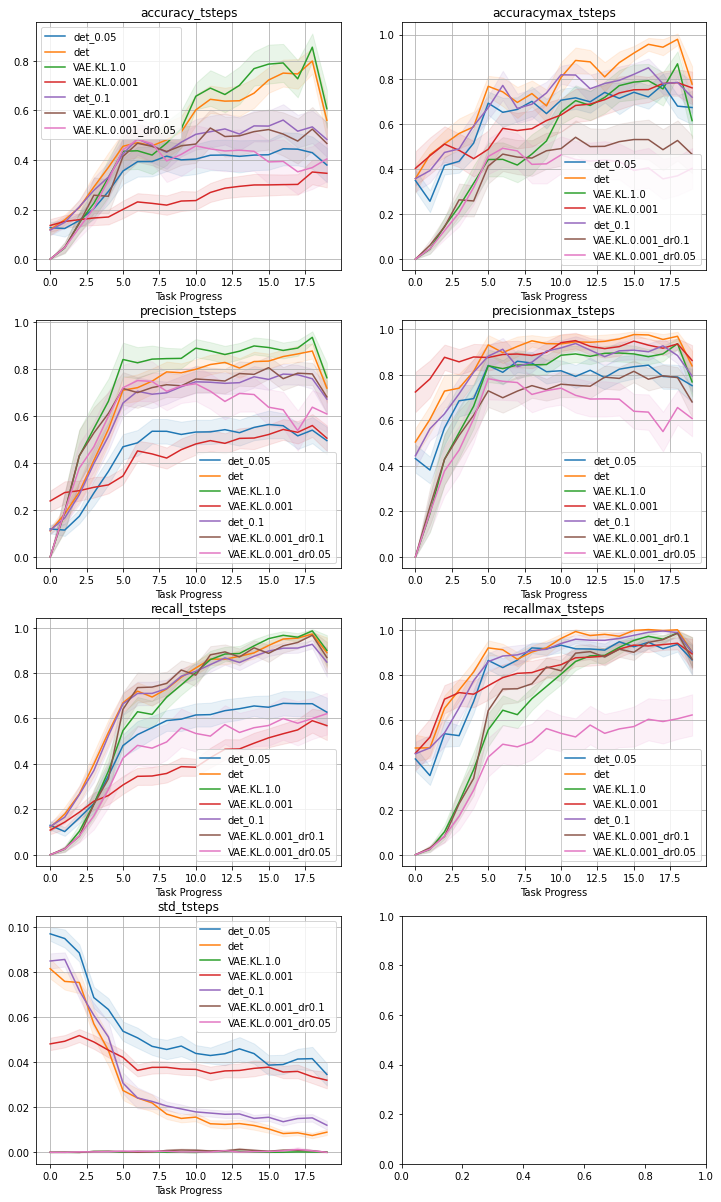

In [169]:
# exp_name = deterministic
nbins = 20
init_path = '../../results/results_smallset_inference_offline'
exp_names = glob.glob(f'{init_path}/*')
all_results = {}
for exp_name in exp_names:
    print(f"Loading {exp_name}")
    file_path = exp_name
    exp_name = exp_name.split('/')[-1]
    files_interest = get_files(file_path)
    
    i = 0
    current_results_experiment = []
    for cfile_name in files_interest:
        with open(cfile_name, 'rb') as f:
            cont = pkl.load(f)
        results = compute_metrics(cont['pred_task'][1:], cont['gt_task'], cont['length'])
        results_bin = {}
        for resultname, resultval in results.items():
            if 'tsteps' in resultname:
                results_bin[resultname] = bin_data(resultval, cont['length'], nbins)
        current_results_experiment.append(results_bin)
    mean_exp, std_exp = take_average(current_results_experiment)
    all_results[exp_name] = (mean_exp, std_exp)
    
    all_results_together[exp_name] = (mean_exp, std_exp)


plot_bar(all_results)

## Goal Prediction with particles

Loading ../../results/results_smallset_inference_online/VAE.KL.1.0
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20


/tmp/ipykernel_28771/2148286212.py:13: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  val = interpolation.zoom(res[seed, :length], zoom_val)


20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
2

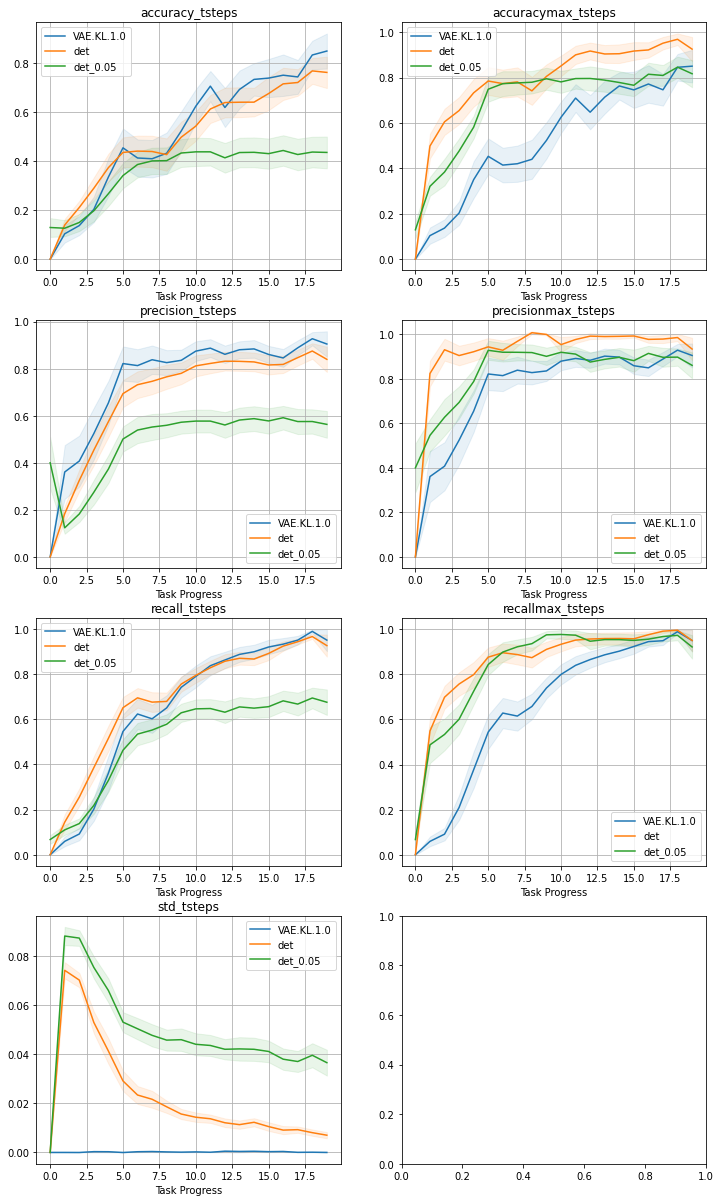

In [217]:
# exp_name = deterministic
nbins = 20
init_path = '../../results/results_smallset_inference_online'
exp_names = glob.glob(f'{init_path}/*')
all_results = {}
for exp_name in exp_names:
    print(f"Loading {exp_name}")
    file_path = exp_name
    exp_name = exp_name.split('/')[-1]
    files_interest = get_files(file_path)
    
    i = 0
    current_results_experiment = []
    for cfile_name in files_interest:
        with open(cfile_name, 'rb') as f:
            file_cont = pkl.load(f)
        
        length = len(file_cont)
        pred_time = []
        for pr in file_cont:
            print(len(pr['pred_task']))
            pred_particles = np.concatenate([pr_part[None, None, :] for pr_part in pr['pred_task']])
            pred_time.append(pred_particles)
        pred_task = np.concatenate(pred_time, 1)
        
        gt_task = np.concatenate([gt_time['gt_task'][None, :] for gt_time in file_cont])
        
        results = compute_metrics(pred_task, gt_task, length)
        results_bin = {}
        for resultname, resultval in results.items():
            if 'tsteps' in resultname:
                results_bin[resultname] = bin_data(resultval, length, nbins)
        current_results_experiment.append(results_bin)
    mean_exp, std_exp = take_average(current_results_experiment)
    all_results[exp_name] = (mean_exp, std_exp)
    all_results_together[exp_name + '_inv_plan'] = (mean_exp, std_exp)

plot_bar(all_results)

dict_keys(['det_0.05', 'det', 'VAE.KL.1.0', 'VAE.KL.0.001', 'det_0.1', 'VAE.KL.0.001_dr0.1', 'VAE.KL.0.001_dr0.05', 'VAE.KL.1.0_inv_plan', 'det_inv_plan', 'det_0.05_inv_plan'])

## Inv Plan vs not inv plan

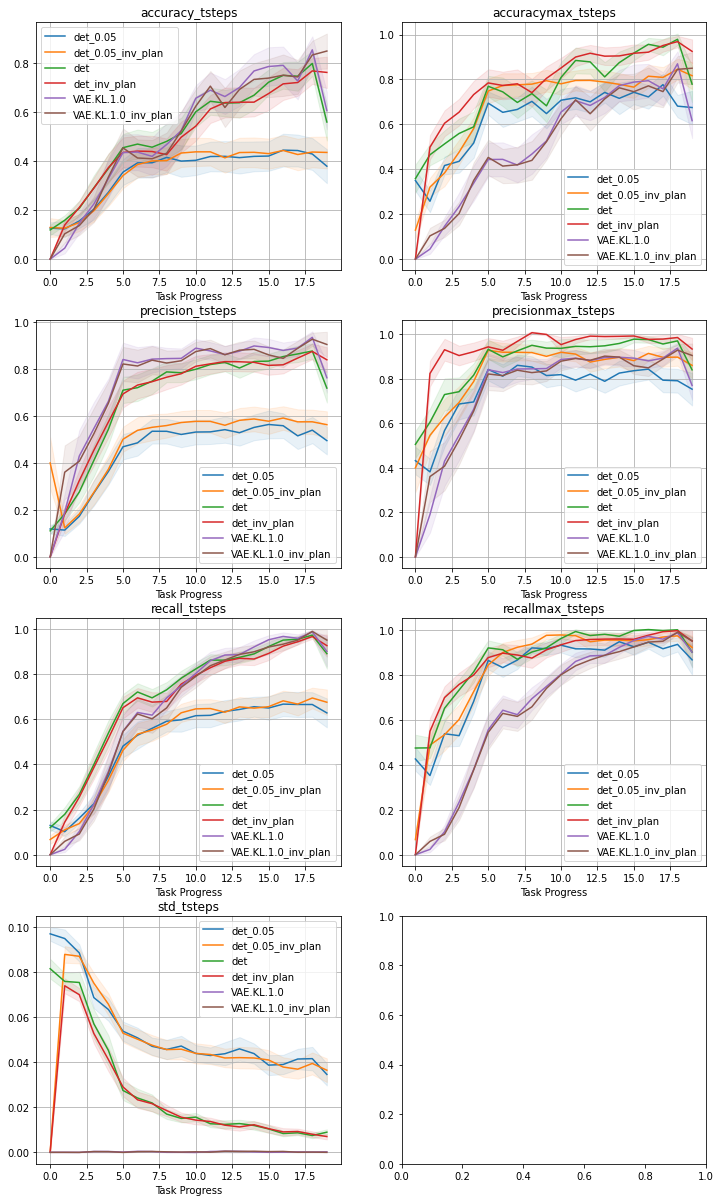

In [173]:
all_results_plot = {}
for name, val in all_results_together.items():
    name_inv = name + '_inv_plan'
    if name_inv in all_results_together:
        all_results_plot[name] = val
        all_results_plot[name_inv] = all_results_together[name_inv]
plot_bar(all_results_plot)

# Helping

In [253]:
def compute_metrics_episode_help(cont, nbins=20):
    
    # Get Goal:
    # TODO: later hopefully we have an easier way to get gT goal
    cont_id = list(cont['gt_goals'].values())[0]['container_ids'][0]
    goal_name = [node['class_name'] for node in cont['graph'][0]['nodes'] if node['id'] == cont_id][0]
    gt_goal = {(gname.split('_')[1], goal_name): g['count'] for gname, g in cont['gt_goals'].items()}
    task_graph_gt = get_tensor_from_prednames(gt_goal)
    
    # For every timestep, compute metrics across proposals
    curr_metrics = []
    pred_graphs = []
    for tstep, proposal in enumerate(cont['proposals']):
        pred_graphs = []
        for p_id, particle in proposal.items():
            graph_pred = get_tensor_from_prednames(particle['pred'][-1][0])
            pred_graphs.append(graph_pred)
        curr_metrics.append(compute_metrics_particles(pred_graphs, task_graph_gt))
    
    # Aggregate metrics over tsteps
    # Put them n bins
    final_metric_dict = {}
    for metric_name in curr_metrics[0].keys():
        final_metric_tsteps = np.array(
            [metric[metric_name] for metric in curr_metrics]
        ).reshape(-1).astype(np.float32)
        if nbins is not None:
                
            curr_len = final_metric_tsteps.shape[0]
            final_metric_tsteps = bin_data(final_metric_tsteps[None, :], curr_len, nbins)
        
        final_metric_dict[metric_name] = final_metric_tsteps
    return final_metric_dict

def get_tensor_from_prednames(pred_names):
    res = np.zeros(136)
    indices_and_values = [(predicate_dict[pred_name], value) for pred_name, value in pred_names.items()]
    indices = [v[0] for v in indices_and_values]
    values = [v[1] for v in indices_and_values]
    res[indices] = values
    return res 

def plot_episodes(file_eps, episode_ids):
    total_res = []
    for episode_id in tqdm(episode_ids):
        res = file_eps[1][episode_id]
        seeds = [ind for ind, val in enumerate(res['S']) if val == 1]
        if len(seeds) == 0:
            continue
        all_res = []
        for seed in seeds:
            # Load file
            with open(file_eps[0][(episode_id, seed)], 'rb') as f:
                cont = pkl.load(f)
            final_metric_dict = compute_metrics_episode_help(cont)
            
            all_res.append(final_metric_dict)
        # Average over seeds
        mean, std = take_average(all_res)
        total_res.append(mean)
    
    # Average over episodes
    return take_average(total_res)

In [258]:
tshu_dir = '/data/vision/torralba/frames/data_acquisition/SyntheticStories/agent_preferences/tshu/agent_preferences'
xavi_dir = '/data/vision/torralba/frames/data_acquisition/SyntheticStories/online_wah/agent_preferences/results/results_smallset_help'
with open('../metadata/pred_dict.pkl', 'rb') as f:
    predicate_dict = pkl.load(f)
predicate_dict = {pred_name: index for index, pred_name in enumerate(predicate_dict)}


paths_dict = {
     "Uniform": f"{tshu_dir}/outputs/helping_states_fastwalk_r_1_3_ip1_uniform_20_1.0_1.0_5.0",
     "w/o InvPlanning": f"{tshu_dir}/outputs/helping_states_fastwalk_r_1_3_ip0_detfull_encoder_task_graph_20_1.0_1.0_5.0",
     "1 Goal": f"{tshu_dir}/outputs/helping_states_fastwalk_r_1_3_ip0_detfull_encoder_task_graph_1_1.0_1.0_5.0",
     "Ours": f"{tshu_dir}/outputs/helping_states_fastwalk_r_1_3_ip1_detfull_encoder_task_graph_20_1.0_1.0_5.0",
     "Random Goal": f"{xavi_dir}/helping_random_goal_fast"
}
def build_path(goal):
    path = '{}/test_env_task_set_60_full_task.all'.format(paths_dict[goal])
    paths = glob.glob('{}/logs*'.format(path))
    
    cont_dict = {}
    ind = 2
    path_res = '{}/results_{}.pik'.format(path, ind)
    with open(path_res, 'rb') as f:
        cont = pkl.load(f)
    path_dict = {}
    for path in paths:
        path_index = path.split('.')[-3].split('_')[0]
        seed_index = path.split('.')[-2]
        try:
            path_dict[(int(path_index), int(seed_index))] = path
        except:
            pass
    return path_dict, cont

In [ ]:
task_results_all = {}
for task_name in paths_dict.keys():
    curr_paths_file = build_path(task_name)
    episodes = list(sorted(set([epi[0] for epi in curr_paths_file[0]])))
    mean_metric, std_metric = plot_episodes(curr_paths_file, episodes)
    task_results_all[task_name] = (mean_metric, std_metric)

  0%|                                                                                                                                                         | 0/20 [00:00<?, ?it/s]/tmp/ipykernel_28771/2148286212.py:13: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  val = interpolation.zoom(res[seed, :length], zoom_val)
 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 16/20 [01:05<00:21,  5.28s/it]/tmp/ipykernel_28771/3432060027.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  final_metric_tsteps = np.array(
 25%|████████████████████████████████████▎                            

In [ ]:
plot_bar(task_results_all)

ls results

In [255]:
pwd


'/data/vision/torralba/frames/data_acquisition/SyntheticStories/online_wah/agent_preferences/analysis/final_res'

In [ ]:
ls ../../results/results_smallset_help/